# **Algorithm and Data Mining for Data Science**



## **#2 Homework: Instagram Profiles & Posts**

### **[RQ1] = Exploratory Data Analysis**
What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.

In [3]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####  Step 1: Importing Datasets

In [40]:
df_inst_loc= pd.read_csv('instagram_locations.csv', sep='\t')

In [5]:
df_inst_posts= pd.read_csv('instagram_posts.csv', sep='\t', chunksize=1000000)

In [4]:
df_inst_prof= pd.read_csv('instagram_profiles.csv', sep='\t')

#### Step 2: Understanding the big picture with Tabular Representation

In [6]:
df_inst_loc.head(5)

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


In [7]:
for chunk in df_inst_posts:
    display(chunk.head())
    break

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2.237948e+09,1.022366e+15,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,5.579335e+09,4.574268e+14,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,3.134296e+08,4.574268e+14,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,28370934,-1,BKTKeNhjEA7,1.837593e+09,4.574268e+14,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,28370935,-1,8-NQrvoYLX,1.131527e+09,4.574268e+14,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8,0


In [8]:
df_inst_prof.head(5)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


In [9]:
df_inst_loc.shape

(1022658, 23)

1022658 rows and 23 columns for instagram location dataset

In [11]:
sumChunks = 0
for count, chunk in enumerate(df_inst_posts,start=1):
    sumChunks = sumChunks + chunk.shape[0]
print(sumChunks)

41710197


41710197 rows and 10 columns for instagram posts dataset

In [12]:
df_inst_prof.shape

(4509586, 11)

###### 4509586 rows and 11 columns for instagram profiles dataset

In [13]:
df_inst_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

In [28]:
df_inst_prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   sid                  int64  
 1   profile_id           float64
 2   profile_name         object 
 3   firstname_lastname   object 
 4   description          object 
 5   following            float64
 6   followers            float64
 7   n_posts              float64
 8   url                  object 
 9   cts                  object 
 10  is_business_account  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB


In [42]:
#How many unique countries are present in the location dataset?
var = df_inst_loc.dir_country_name.nunique()
var_1 = str(var)
print('In the Location Dataset there are '+ var_1 + ' unique countries')

In the Location Dataset there are 235 unique countries


In [43]:
#How many unique profiles are present in the profiles dataset?
var = df_inst_prof.profile_name.nunique()
var_2= str(var)
print(('In the Profile Dataset there are '+ var_2 + ' unique profiles'))

In the Profile Dataset there are 4508180 unique profiles


#### Step 3: Visual Analytics

In [47]:
df_inst_prof.select_dtypes(include = ['float64']).head() #select only numeric columns 

,profile_id,following,followers,n_posts
0,4.721050e+09,250.0,146.0,170.0
1,5.905830e+08,534.0,1145.0,2878.0
2,1.074147e+09,469.0,324.0,431.0
3,1.472039e+09,NaN,NaN,NaN
4,3.531421e+09,NaN,NaN,NaN


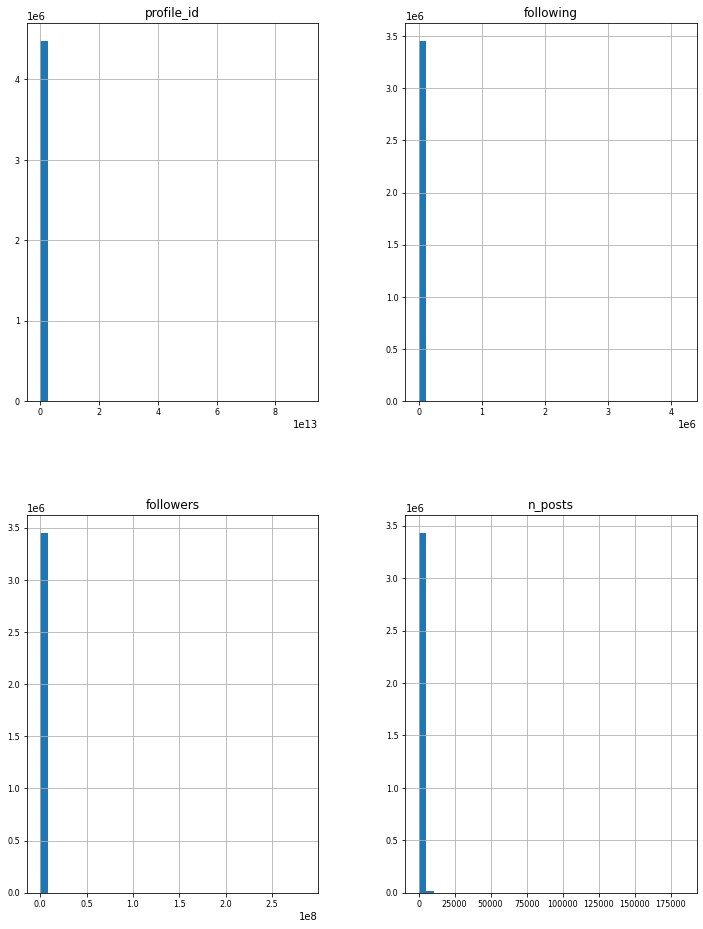

In [59]:
df_inst_prof.select_dtypes(include = ['float64']).hist(figsize=(12, 16), bins=35, xlabelsize=8, ylabelsize=8) # plot histograms of numeric columns
plt.show()

Poor data variability except for n_posts with a little variability

## [RQ2] = Simple Insights
#### Explore the dataset by finding simple insights regarding the profile and posts.

##### Plot the number of posts for each profile in descending order.

In [19]:
df_inst_prof.groupby(["profile_id"], dropna=True)['n_posts'].sum()
df_inst_prof.sort_values(by='n_posts', ascending = False)

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
3990313,3661552,1.996648e+08,jasem33312,jasem33312,NaN,2.0,82049.0,183730.0,NaN,2019-06-30 19:14:19.780 -0400,False
2571453,3288809,8.563367e+09,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,142428.0,vk.com/ru.helperwait,2019-05-07 00:14:06.799 -0400,True
4338921,3970193,1.273455e+09,rudyanto62,Rudyanto 王耀祝,NaN,164.0,1693.0,126340.0,NaN,2019-07-15 10:00:51.171 -0400,False
3942129,3621669,9.813508e+06,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,125220.0,NaN,2019-06-27 02:49:38.140 -0400,False
4219642,3851869,1.607309e+09,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,117262.0,bit.ly/2GdIYJl,2019-07-13 02:10:07.317 -0400,True
...,...,...,...,...,...,...,...,...,...,...,...
4509575,4184448,2.438073e+08,not_omeed,أوميد,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:39:06.271 -0400,NaN
4509577,4184452,6.567796e+08,shak._n5,Shakil Hussain,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:39:23.911 -0400,NaN
4509582,4184469,1.340704e+07,jornvlaeminck,Jorn Vlaeminck,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:41.628 -0400,NaN
4509583,4184470,6.007354e+09,s_degol,Sanne Degol,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:42.983 -0400,NaN


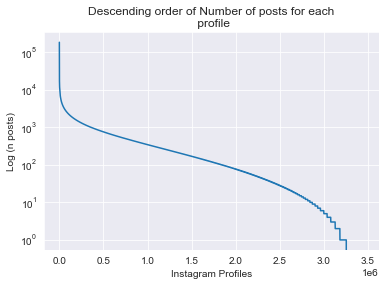

In [5]:
n_posts = df_inst_prof.n_posts.dropna()

plt.plot(np.sort(n_posts)[::-1]);
plt.title('Descending order of Number of posts for each\n profile')
plt.ylabel('Log (n posts)')
plt.xlabel('Instagram Profiles')
plt.yscale('log')

In [2]:
post_analysis= pd.read_csv('instagram_posts.csv', sep="\t",  usecols=['numbr_likes','number_comments'])

##### What posts have the highest number of likes?

In [3]:
post_analysis['numbr_likes'].sort_values(ascending=False).head(15)

19624085    8822952.0
19623988    5447066.0
19624082    5116398.0
19623986    4271466.0
39701024    4264745.0
6293907     3586546.0
19624086    3558599.0
19802016    3533326.0
30850564    3340297.0
39812576    3311246.0
17474533    3201436.0
19624088    3198242.0
37248165    3091301.0
30568676    2973661.0
19623987    2900455.0
Name: numbr_likes, dtype: float64

Note!
On the left the n. of the row, on the left the n. of likes

##### What posts have the most and the highest number of comments?

In [4]:
post_analysis['number_comments'].sort_values(ascending=False).head(15)

41873060    488953.0
12164781    313997.0
33261751    257488.0
11149127    214365.0
9383817     189888.0
5427268     180635.0
25257169    173988.0
6220011     170836.0
31689573    166919.0
14257307    166198.0
19624085    165886.0
30850564    149489.0
27276611    146770.0
11149135    145806.0
28934415    143614.0
Name: number_comments, dtype: float64

##### What posts have the most and the least number of comments?

In [5]:
post_analysis['number_comments'].sort_values(ascending=True).head(15)

0           0.0
13108581    0.0
13108584    0.0
13108585    0.0
13108586    0.0
13108587    0.0
13108588    0.0
13108589    0.0
13108590    0.0
13108591    0.0
13108593    0.0
13108594    0.0
13108596    0.0
13108597    0.0
13108580    0.0
Name: number_comments, dtype: float64

##### How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

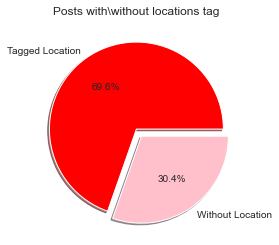

In [9]:
tag_loc = 0
no_loc = 0

for chunk in pd.read_csv('instagram_posts.csv', sep='\t', chunksize=500000, usecols=['location_id']):
    no_loc += chunk.location_id.isna().sum()
    tag_loc += len(chunk)                           # Using chunks we just count the missing values in location_id column


plt.pie([tag_loc - no_loc, no_loc], labels=['Tagged Location', 'Without Location'], shadow=True, explode=(0, .1), autopct='%1.1f%%', colors = ['red', 'pink'])
plt.title('Posts with\without locations tag')
plt.show()

The pie chart clearly tells us that the majority of posts in our dataset have tagged location (69,6%), while still a great portion of 30,4% isn't localized.

##### How many posts include only photos? How many also have videos?

In [6]:
post_analysis_1= pd.read_csv('instagram_posts.csv', sep="\t",  usecols=['post_type'])
photos = post_analysis_1.loc[post_analysis_1['post_type'] == 1, 'post_type'].sum()
video_photos = post_analysis_1.loc[post_analysis_1['post_type'] > 1, 'post_type'].sum()

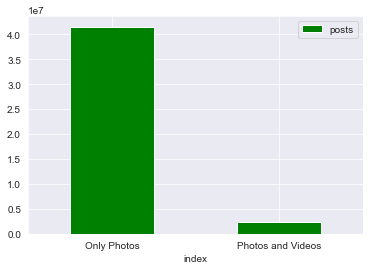

In [7]:
df = pd.DataFrame({'posts': [photos, video_photos],
                   'index': ['Only Photos', 'Photos and Videos']})

plot = df.plot.bar(x='index', y='posts', rot=0, color= 'green')

In [12]:
profiles = df_inst_prof[['is_business_account','profile_name']]

Business =len(profiles[profiles['is_business_account'] == True])

#count how many NOT business account
Not_business = len(df_inst_prof[df_inst_prof['is_business_account'] == False])

total_account = Business + Not_business
yes_perc='{:.1%}'.format(Business/total_account)
no_perc='{:.1%}'.format(Not_business/total_account)
print('Percentage of business accounts in the dataset is equal to '+ yes_perc)
print('Percentage of non business accounts in the dataset is equal to '+ no_perc)

Percentage of business accounts in the dataset is equal to 24.8%
Percentage of non business accounts in the dataset is equal to 75.2%


The majority of users in this dataset are using Instangram for personal entertainment rather than as source of profit

## [RQ3] = Most common publishing time
#### Understand the most common times in which users publish their posts

##### What is the most common time in which users publish their posts?

In [50]:
post_cts_analysis = pd.read_csv('instagram_posts.csv', sep="\t",  usecols=['profile_id','cts',"number_comments","numbr_likes"])

In [12]:
time_mode = pd.to_datetime(post_cts_analysis['cts']).dt.strftime('%H:%M:%S').mode() # get requested time format 

print('Users usually publish their posts at {}'.format(time_mode[0]))

Users usually publish their posts at 21:00:09


##### Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [34]:
def plot_intervals(data, time_intervals):
    time = pd.DataFrame(pd.to_datetime(data.cts))
    time.set_index(pd.DatetimeIndex(time.cts), inplace=True)
    calculation = 0
    values = pd.DataFrame()
    for interval in time_intervals:
        initial_time, final_time = interval
        tot = time.between_time(initial_time, final_time).count()
        tot = int(tot[0])
        print([interval],tot)
        result = pd.DataFrame({'time interval (start, end)' : [interval], 'total posts' : tot})
        values = values.append(result)
        calculation += tot
    sns.set()

    ax = values.plot(figsize=(14,8), kind='bar', color = 'red', zorder=3)
    a = range(0, 6)
    plt.xticks(a, time_intervals, rotation = 30)
    plt.xlabel("Time Intervals", fontsize=14, labelpad=20)
    plt.ylabel("N of posts", fontsize=14, labelpad=20)
    plt.title("Number of posts for each time interval", fontsize=18)
    plt.show()

[('06:00:00', '10:59:59')] 6378572
[('11:00:00', '13:59:59')] 5614715
[('14:00:00', '16:59:59')] 6763037
[('17:00:00', '19:59:59')] 7409907
[('20:00:00', '23:59:59')] 8915794
[('00:00:00', '02:59:59')] 4213617
[('03:00:00', '05:59:59')] 3411223


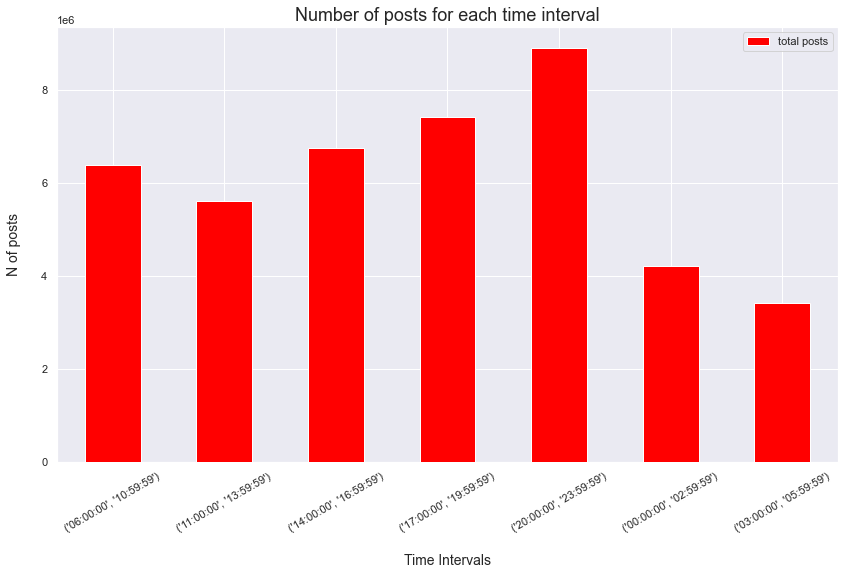

In [35]:
timing= [('06:00:00', '10:59:59'),('11:00:00', '13:59:59'), 
         ('14:00:00', '16:59:59'), ('17:00:00', '19:59:59'), 
         ('20:00:00', '23:59:59'), ('00:00:00', '02:59:59'), ('03:00:00','05:59:59')]

plot_intervals(post_cts_analysis, timing)

Posts are mainly published on Instagram between 20:00 and Midnight time interval.

## [RQ4] = Analysis Enhancement

##### Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

In [37]:
def get_post(profile_id,posts_df):
    return posts_df[posts_df.profile_id == profile_id]

##### Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.

In [26]:
def posts_top_profiles(n,posts_df,profile_df):
    top_posted_profiles = profile_df.sort_values('n_posts',ascending=False).profile_id.head(n+1)
    output_posts = []
    for id in top_posted_profiles:
        output_posts.append(get_post(id,posts_df))
    result = pd.concat(output_posts)
    return result

In [27]:
top_posted = df_inst_prof.sort_values('n_posts',ascending=False).profile_id.head(11)
display(posts_top_profiles(10,post_cts_analysis,df_inst_prof))

,profile_id,cts,numbr_likes,number_comments
9592952,1.996648e+08,2018-12-02 03:03:33.000,0.0,0.0
9592953,1.996648e+08,2018-12-02 03:03:17.000,0.0,0.0
9592954,1.996648e+08,2016-03-07 16:28:50.000,27.0,0.0
9592955,1.996648e+08,2015-05-18 11:21:27.000,28.0,0.0
9592956,1.996648e+08,2018-12-09 13:33:47.000,1.0,0.0
...,...,...,...,...
40437904,1.701679e+09,2019-05-11 08:03:24.000,0.0,0.0
40996459,1.701679e+09,2019-05-23 06:41:49.000,1.0,0.0
41291564,1.701679e+09,2019-05-20 07:51:12.000,1.0,0.0
42357392,1.701679e+09,2019-05-22 08:54:51.000,1.0,0.0


##### What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

In [30]:
posts_top_profiles(10,post_cts_analysis,df_inst_prof).groupby("profile_id")[['numbr_likes','number_comments']].mean()

,numbr_likes,number_comments
profile_id,,
9.813508e+06,0.296296,0.000000
1.996648e+08,7.666667,0.000000
2.181730e+08,0.400000,0.040000
2.855497e+08,3.921875,0.000000
1.087614e+09,2.026316,0.184211
1.273455e+09,2.960000,0.040000
1.603890e+09,6.477612,0.044776
1.607309e+09,1.540541,0.000000
1.701679e+09,1.447368,0.000000


##### Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3.Interpret the resulting chart. List with cts and posts of the top 10 profiles

In [47]:
a = df_inst_prof.sort_values("n_posts",ascending = False)      #create a table with profile_id,sorted by "n_posts"
Top10 = a.head(11)  #obtained the top 10 profiles with more posts

Top10.reset_index().drop(["index"],axis = 1)
Top_10=Top10.drop(["n_posts"],axis=1)

list_10 = pd.DataFrame(columns = ["profile_id","cts"])

for chunk in post_cts_analysis:
    chunk_in_common = pd.merge(chunk,Top_10)
    list_10 = pd.concat([list_10,chunk_in_common])
list_10

TypeError: Can only merge Series or DataFrame objects, a <class 'str'> was passed

In [ ]:
plot_intervals(list_10, timing)

In [49]:
pd.merge(post_cts_analysis,Top_10)

,profile_id,cts,numbr_likes,number_comments,sid,profile_name,firstname_lastname,description,following,followers,url,is_business_account


In [51]:
Top_10

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,url,cts,is_business_account
3990313,3661552,1.996648e+08,jasem33312,jasem33312,NaN,2.0,82049.0,NaN,2019-06-30 19:14:19.780 -0400,False
2571453,3288809,8.563367e+09,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,vk.com/ru.helperwait,2019-05-07 00:14:06.799 -0400,True
4338921,3970193,1.273455e+09,rudyanto62,Rudyanto 王耀祝,NaN,164.0,1693.0,NaN,2019-07-15 10:00:51.171 -0400,False
3942129,3621669,9.813508e+06,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,NaN,2019-06-27 02:49:38.140 -0400,False
4219642,3851869,1.607309e+09,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,bit.ly/2GdIYJl,2019-07-13 02:10:07.317 -0400,True
2207897,345591,1.087614e+09,waxking911,Frank Hernandez,NaN,134.0,138.0,NaN,NaN,False
4313908,3944512,1.603890e+09,gamt_official,Official IG Of GAMT Thailand,❥ แว่น gamt พร้อมส่งของแท้💯 มีโปร1290 พร้อมซอง...,7470.0,36001.0,bit.ly/2GdIYJl,2019-07-14 21:10:30.785 -0400,True
4219476,3851808,2.181730e+08,collarosedw_official,grapeseed+collarose,🍇 สินค้าแบรนด์ dwplus\n💓 collarose+grapeseed+f...,7496.0,18021.0,bit.ly/2asesw7,2019-07-13 02:08:17.407 -0400,True
4236057,3868432,2.855497e+08,gamt_authentic,Official IG Of GAMT Thailand,❥ แว่น gamt พร้อมส่ง มีโปร1290 พร้อมซองแว่น+ผ้...,7480.0,27511.0,bit.ly/2T2RIqG,2019-07-13 09:28:30.025 -0400,True
1631526,1312725,8.312603e+09,ivankkkka.trmp,IVANKA DARCEY K. TRUMP,DORA. 👄 #Mango,7497.0,2.0,www.flightclub.com/yeezy,2019-04-01 02:41:26.980 -0400,False
